In [3]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 462.4351806640625
199 316.7353820800781
299 218.0659942626953
399 151.17271423339844
499 105.77310180664062
599 74.9273910522461
699 53.94650650024414
799 39.65944290161133
899 29.919662475585938
999 23.272266387939453
1099 18.7301082611084
1199 15.622994422912598
1299 13.49506664276123
1399 12.036084175109863
1499 11.034600257873535
1599 10.346352577209473
1699 9.872864723205566
1799 9.546751976013184
1899 9.32188606262207
1999 9.1666898727417
Result: y = 0.016419366002082825 + 0.8668850660324097 x + -0.002832614118233323 x^2 + -0.0947733148932457 x^3


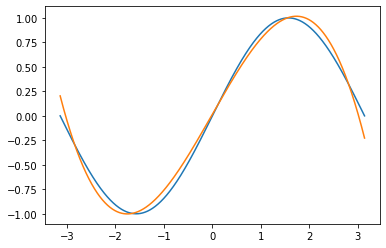

In [13]:
import matplotlib.pyplot as plt

plt.plot(x.cpu().numpy(), y.cpu().numpy())
plt.plot(x.cpu().numpy(), (model.a.item() + model.b.item()*x+ model.c.item()*x** 2+model.d.item()*x**3).cpu().numpy())
plt.show()